In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import  train_test_split

In [41]:
gender_classification_v7= pd.read_csv("gender_classification_v7.csv")
diabetes= pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
education_data= pd.read_csv("xAPI-Edu-Data.csv")
wine=pd.read_csv("winequality-red.csv")
Iris=pd.read_csv("Iris.csv")


In [5]:
gender_classification_v7.head(3)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male


In [42]:
diabetes.head(3)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0


In [7]:
education_data.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L


In [10]:
Iris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


## Perform stratified cross-validation

In [19]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [21]:
from sklearn.model_selection import StratifiedKFold
x = Iris.iloc[:,:-1]
y = Iris.iloc[:,-1]


## Iris dataset

In [24]:

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

print(skf)
StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
try:
    for train_index, test_index in skf.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
except:
    a=0

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [  5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149] TEST: [  0   1   2   3   4  50  51  52  53  54 100 101 102 103 104]


## Iris

In [46]:
x1 = gender_classification_v7.iloc[:,:-1]
y1 = gender_classification_v7.iloc[:,-1]


## Random forest on Iris

In [49]:
# Import train_test_split function

from sklearn.model_selection import train_test_split

X=Iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Features
y=Iris['Species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [50]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [51]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


## stratified cross valida gender_classification_v7

In [47]:
print(skf)
StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
try:
    for train_index, test_index in skf.split(x1, y1):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
except:
    a=0

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 491  493  494 ... 4998 4999 5000] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218

## Diabetes stratified validation

In [43]:

x2 = diabetes.iloc[:,:-1]
y2 = diabetes.iloc[:,-1]

In [45]:
print(skf)
StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
try:
    for train_index, test_index in skf.split(x2, y2):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
except:
    a=0

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 21369  21458  21587 ... 253677 253678 253679] TEST: [    0     1     2 ... 25513 25515 25516]


## elbow

In [55]:
distortions = []
K = range(1,18)
print(K)

range(1, 18)


In [63]:
from scipy.spatial.distance import cdist
import math
Iris.head()
XX = Iris.loc[:,['PetalLengthCm', 'PetalWidthCm']]
XX

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [68]:
# get data and show some records
data = pd.read_csv('Iris.csv')
data = data.drop('Id', axis=1) # get rid of the Id column - don't need it

X = data.iloc[:,0:4]
y = data.iloc[:,-1]
from sklearn.cluster import KMeans
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)
nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [69]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.4589717867018717

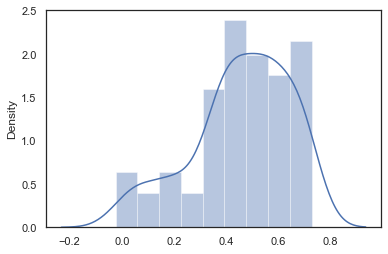

In [71]:
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

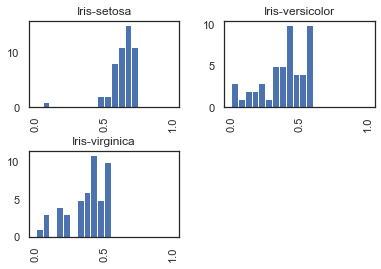

In [72]:
# can we add the species info to that plot?
# well, can plot them separately using pandas - 
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = data['Species']
df_scores.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=20);